In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from os import walk

In [22]:
data = {
   # 0: np.loadtxt('../data/4/Magnetfeld_senkrecht_31Hz_100mVpp_Offset0mV_0mA'),
    15: np.loadtxt('../data/4/Magnetfeld_senkrecht_31Hz_100mVpp_Offset49mV_15mA'),
    17: np.loadtxt('../data/4/Magnetfeld_senkrecht_31Hz_100mVpp_Offset56mV_17mA'),
    19: np.loadtxt('../data/4/Magnetfeld_senkrecht_31Hz_100mVpp_Offset63mV_19mA'),
}

In [24]:
import math

mu_null = 1.2566e-6
N = 80
R = 9e-2
b_i = lambda cur: cur * (mu_null * 8 *N / (math.sqrt(125) * R))

15
17
19


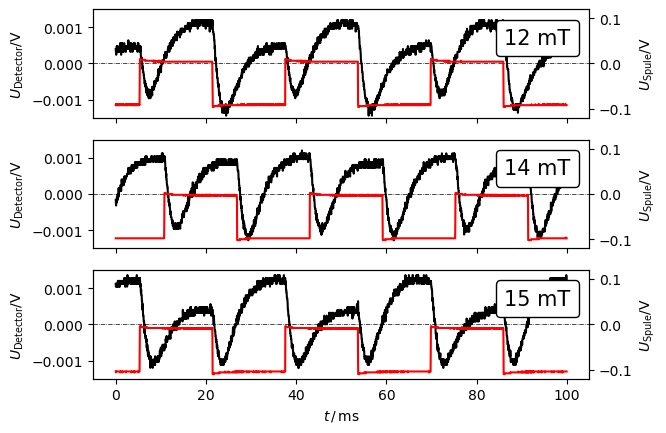

In [26]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(len(data), 1, sharex='all')
for i,I in enumerate(data):
    print(I)
    ax1 = ax[i]
    ax2 = ax1.twinx()

    transmission = data[I][:, 2]
    time = data[I][:, 0] * 1e3
    magnetic_field = data[I][:, 1] / 10

    ax1.plot(time, transmission,'k', label='Transmission')
    ax1.set(ylabel='$U_\mathrm{Detector} / \mathrm{V}$', ylim=[-0.0015, 0.0015])
    ax2.set(ylabel='$U_\mathrm{Spule} / \mathrm{V}$', ylim=[-0.12, 0.12])
    ax2.axhline(y = 0, color = 'k', linestyle = '-.', linewidth = '0.5')
    ax2.plot(time, magnetic_field, c='r',label='Spulenspannung')
    at = AnchoredText(
    f'{b_i(I)*1e3:.0f} mT', prop=dict(size=15), frameon=True, loc='upper right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax1.add_artist(at)
ax[-1].set(xlabel='$t\,/\, \mathrm{ms}$')

fig.savefig('../output/magnetfeld.svg')
